# Proyek Analisis Data: Nama dataset
- Nama: Dhea Yuza Fadiya
- Email: dheayuza@gmail.com
- Id Dicoding: dhea_yuza

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penggunaan sepeda berubah sepanjang tahun (2011-2012) dan apakah ada tren yang signifikan?
- Bagaimana faktor musim memengaruhi permintaan sepeda untuk penggunaan harian?
- Bagaimana faktor cuaca (misalnya, suhu, kelembapan, kondisi cuaca) memengaruhi permintaan sepeda untuk penggunaan harian?

## Menyaipkan semua library yang dibuthkan

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Membuat dataframe day_df yang berisikan isi dari file day.csv terkait bike sharing counts aggregated on daily basis dan hour_df yang berisikan isi dari file hour.csv terkait bike sharing counts aggregated on hourly basis

In [61]:
day_df = pd.read_csv('/content/day.csv')
hour_df = pd.read_csv('/content/hour.csv')

In [62]:
# Check the first 5 rows
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [63]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [64]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Pada dataframe day_df memiliki 16 columns dan 731 nilai non-null dalam setiap feature-feature yang ada. Feature yang memiliki tipe data int64 sebanyak 11 dan feature yang memiliki tipe data float64 sebanyak 4. Pada feature dteday terjadi kesalahan tipe data karena tertera tipe datanya object yang harus dirubah menjadi datetime64.

In [65]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak terdapat Missing Value pada dataframe yang ada

In [66]:
day_df.duplicated().sum()

0

Tidak terdapat dupilikasi data pada dataframe yang ada

In [67]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Pada feature "temp", "atemp", "hum", "windspeed" telah mengalami normalisasi data. Maka dari itu, data yang ditampilkan jangkauannya tidak sesuai dengan kenyataan yang ada. Pada feature "season", "yr", dan "weathersit" telah mengalami label encoding sedangkan feature "holiday" dan "workingday" nilainya boolean (0/1). Kesimpulannya tidak terdapatnya keanehan dalam ringkasan parameter statistik dari day_df, setiap fitur sesuai jika ditinjau juga dari data karakteristik pada file readme yang ada.

In [68]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Pada dataframe hour_df memiliki 17 columns dan 17379 nilai non-null dalam setiap feature-feature yang ada. feature yang memiliki tipe data int64 sebanyak 12 sedangkan dengan feature yang memiliki tipe data float64 sebanyak 4. Pada feature dteday terjadi kesalahan tipe data karena tertera tipe datanya object yang harus dirubah menjadi datetime64.

In [69]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak terdapat Missing Value pada dataframe yang ada

In [70]:
hour_df.duplicated().sum()

0

Tidak terdapat dupilikasi data pada dataframe yang ada

In [71]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Pada feature "temp", "atemp", "hum", "windspeed" telah mengalami normalisasi data maka dari itu data yang ditampilkan rangenya tidak sesuai dengan kenyataan yang ada. Pada feature "season", "yr", dan "weathersit" telah mengalami label encoding sedangkan feature "holiday" dan "workingday" nilainya boolean (0/1). Kesimpulannya tidak terdapatnya keanehan dalam ringkasan parameter statistik dari hour_df setiap fitur sesuai jika ditinjau juga dari data karakteristik pada file readme yang ada.

### Cleaning Data

Memperbaiki Tipe Data pada Fitur "dteday" menjadi Datetime di Kedua Dataframe

In [72]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

In [73]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [74]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

In [75]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore data *day_df*

In [76]:
# Table Description
day_df.describe(include="all")

<ipython-input-76-720650787d2c>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


Dari data diatas, dapat diketahui :

* Data pada kolom "season" memiliki 4 nilai unik yaitu musim semi, musim panas, musim gugur, musim dingin.

* Data pada kolom "yr" menunjukkan tahun 2011 dan tahun 2012.

* Selanjutnya, data pada kolom "mnth" menunjukkan nilai dari 1 hingga 12, yang diasumsikan sebagai bulan.

* Selain itu, terdapat kolom-kolom "holiday", "weekday", dan "workingday" yang merupakan variabel biner, menandakan apakah hari tersebut adalah hari libur, hari kerja, atau hari libur tetapi bukan akhir pekan.

* Pada data pada kolom "weathersit" memiliki 3 nilai unik, yang diasumsikan sebagai kondisi cuaca seperti cerah, berawan, dan hu

In [77]:
day_df.replace({
    "season": {1: "Springer", 2: "Summer", 3: "Fall", 4: "Winter"},
    "yr": {0: 2011, 1: 2012},
    "holiday": {0: "Not Holiday", 1: "Holiday"},
    "workingday": {0: "Holiday", 1: "Working Day"},
    "weekday": {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"}
    }, inplace=True)

* Label pada *season* sesuai urutan 1, 2, 3, dan 4 adalah  musim semi, musim panas, musim gugur, musim dingin.
* Label pada *year* atau tahun untuk 0 adalah tahun 2011 dan 1 adalah tahun 2012.
* Label pada *holiday* atau hari liburan adalah 0 untuk tidak libur dan 1 untuk tidak libur
* Label pada *working day* atau hari saat masuk kerja adalah 0 untuk libur kerja dan 1 untuk masuk kerja.
* Label pada nama-nama hari untuk 0 adalah hari minggu, 1 adalah hari senin, 2 adalah hari selasa, 3 adalah hari rabu, 4 adalah hari kamis, 5 adalah hari jumat, dan 6 adalah hari sabtu.

In [78]:
daily_categorical_data = day_df[["season","yr","holiday","workingday","weekday","weathersit"]]

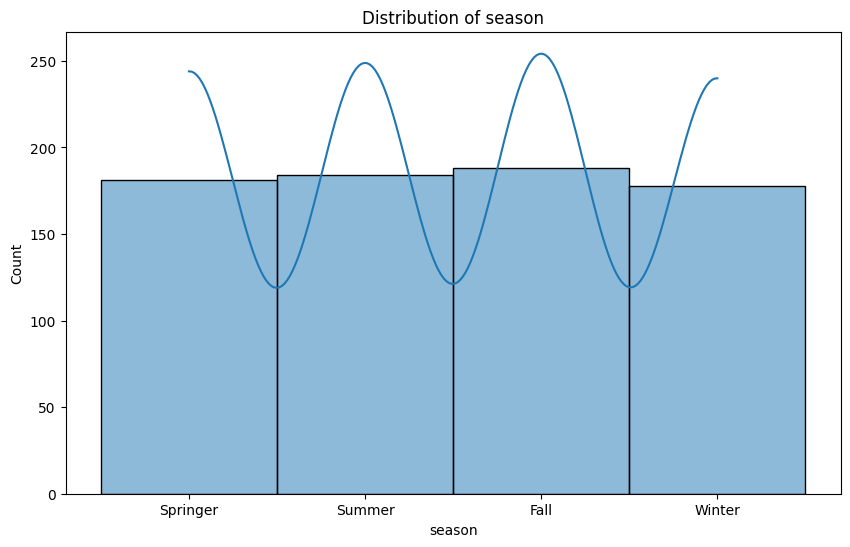

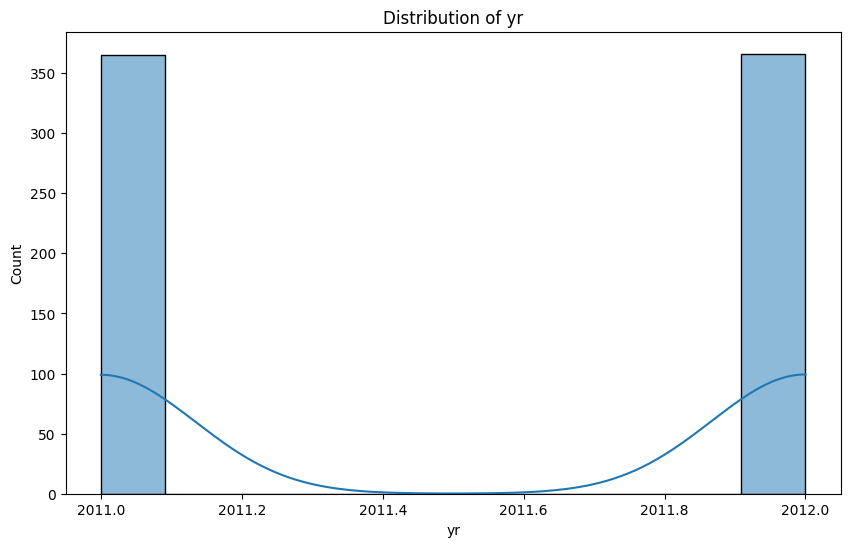

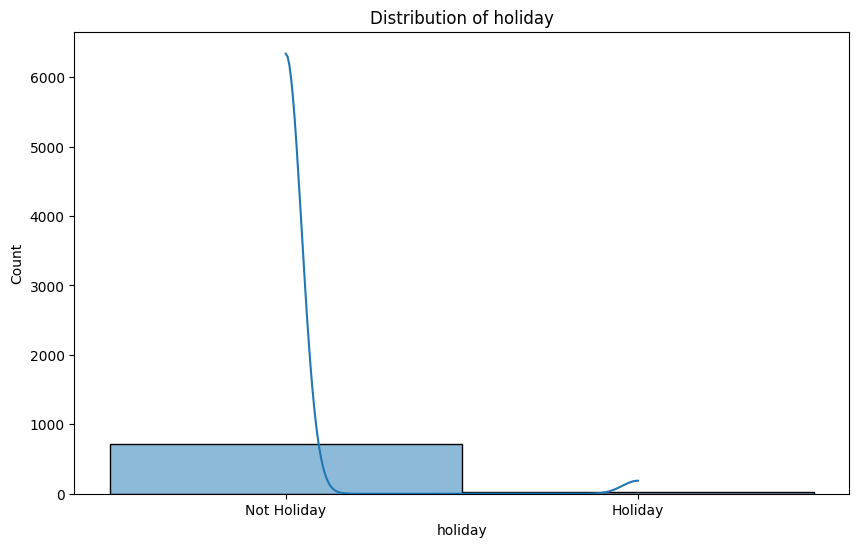

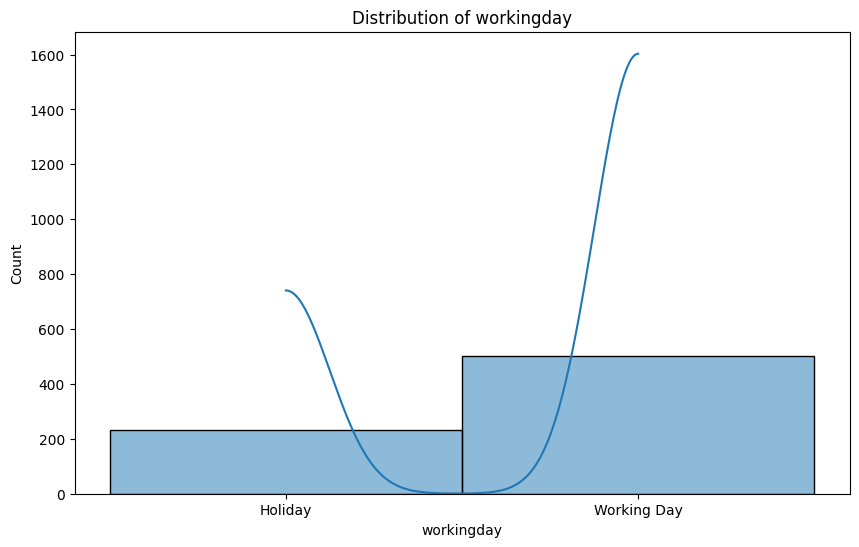

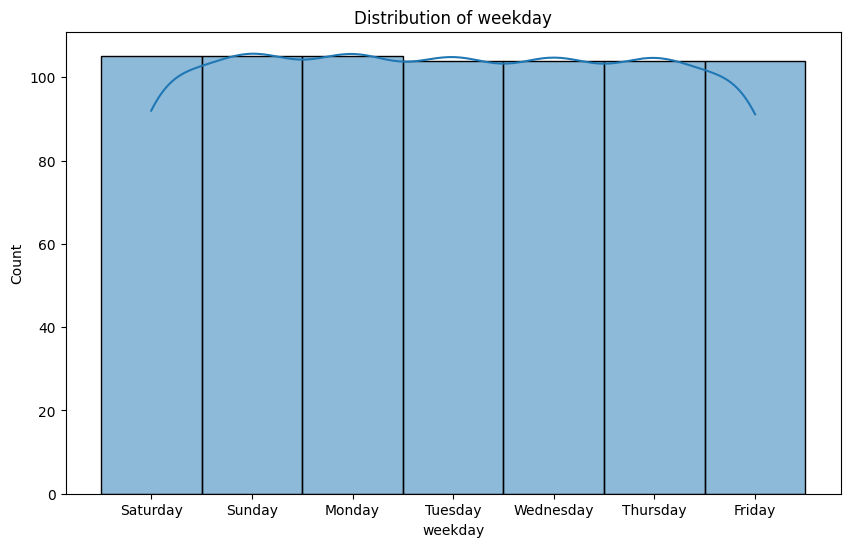

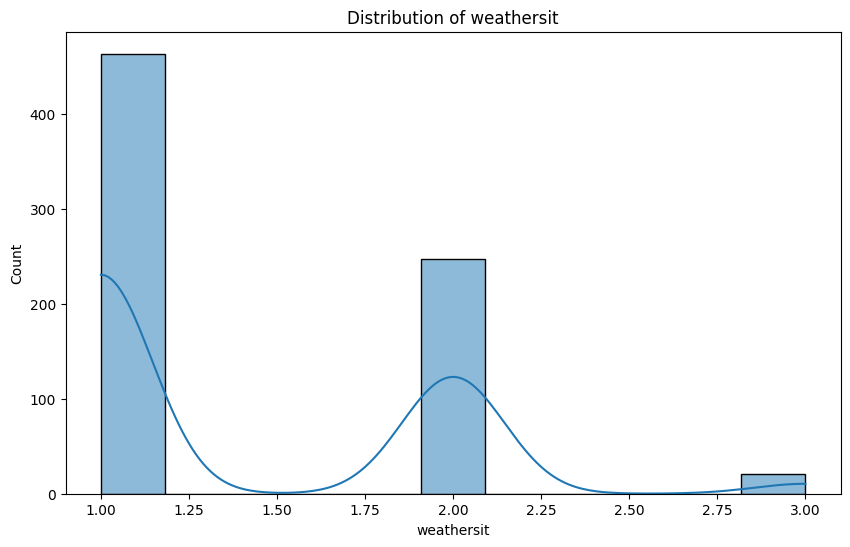

In [79]:
for column in daily_categorical_data.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(daily_categorical_data, x=column, kde=True)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

* Feature Holiday memiliki bentuk histogram yang Right Skewed Distribution.
* Feature Workingday memiliki bentuk histogram yang Left Skewed Distribution.
* Feature Weathersit memiliki bentuk histogram yang Right Skewed Distribution.
* Selain feature diatas diidentifikasi no skew Distribution.

In [86]:
day_df.loc[day_df["season"] == 1, "season"] = "Springer"
day_df.loc[day_df["season"] == 2, "season"] = "Summer"
day_df.loc[day_df["season"] == 3, "season"] = "Fall"
day_df.loc[day_df["season"] == 4, "season"] = "Winter"

day_df.groupby(by="season").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
}).reindex(["Springer", "Summer", "Fall", "Winter"])

instant   cnt                                
         nunique   max   min         mean          std
season                                                
Springer     181  7836   431  2604.132597  1399.942119
Summer       184  8362   795  4992.331522  1695.977235
Fall         188  8714  1115  5644.303191  1459.800381
Winter       178  8555    22  4728.162921  1699.615261

Pada feature season memiliki label masing-masing sesuai dengan urutan label 1, 2, 3, dan 4 adalah musim semi, musim panas, musim gugur, musim dingin.

In [87]:
day_df.loc[day_df["mnth"] == 1, "mnth"] = "January"
day_df.loc[day_df["mnth"] == 2, "mnth"] = "February"
day_df.loc[day_df["mnth"] == 3, "mnth"] = "March"
day_df.loc[day_df["mnth"] == 4, "mnth"] = "April"
day_df.loc[day_df["mnth"] == 5, "mnth"] = "May"
day_df.loc[day_df["mnth"] == 6, "mnth"] = "June"
day_df.loc[day_df["mnth"] == 7, "mnth"] = "July"
day_df.loc[day_df["mnth"] == 8, "mnth"] = "August"
day_df.loc[day_df["mnth"] == 9, "mnth"] = "September"
day_df.loc[day_df["mnth"] == 10, "mnth"] = "October"
day_df.loc[day_df["mnth"] == 11, "mnth"] = "November"
day_df.loc[day_df["mnth"] == 12, "mnth"] = "December"

day_df.groupby(by="mnth").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
}).reindex(["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])

instant   cnt                                
          nunique   max   min         mean          std
mnth                                                   
January        62  4521   431  2176.338710  1161.674370
February       57  5062  1005  2655.298246  1145.313307
March          62  8362   605  3692.258065  1899.301812
April          60  7460   795  4484.900000  1776.160778
May            62  8294  2633  5349.774194  1298.711561
June           60  8120  3767  5772.366667  1240.400031
July           62  8173  3285  5563.677419  1273.751871
August         62  7865  1115  5664.419355  1494.516146
September      60  8714  1842  5766.516667  1810.130649
October        62  8156    22  5199.225806  1988.392517
November       60  6852  1495  4247.183333  1285.712709
December       62  6606   441  3403.806452  1549.639353

Pada feature bulan, mempunyai label masing-masing sebagai nomor 1 sampai 12 yang diasumsikan sebagai urutan nama-nama bulan.

In [90]:
day_df.loc[day_df["weekday"] == 0, "weekday"] = "Sun"
day_df.loc[day_df["weekday"] == 1, "weekday"] = "Mon"
day_df.loc[day_df["weekday"] == 2, "weekday"] = "Tue"
day_df.loc[day_df["weekday"] == 3, "weekday"] = "Wed"
day_df.loc[day_df["weekday"] == 4, "weekday"] = "Thu"
day_df.loc[day_df["weekday"] == 5, "weekday"] = "Fri"
day_df.loc[day_df["weekday"] == 6, "weekday"] = "Sat"

day_df.weekday.value_counts().sort_index()

day_df.groupby(by=["weekday"]).agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
}).reindex(["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])

instant   cnt                                
          nunique   max   min         mean          std
weekday                                                
Sunday        105  8227   605  4228.828571  1872.496629
Monday        105  7525    22  4338.123810  1793.074013
Tuesday       104  7767   683  4510.663462  1826.911642
Wednesday     104  8173   441  4548.538462  2038.095884
Thursday      104  7804   431  4667.259615  1939.433317
Friday        104  8362  1167  4690.288462  1874.624870
Saturday      105  8714   627  4550.542857  2196.693009

Pada feature bulan, mempunyai label masing-masing sebagai nomor 0 sampai 6 yang diasumsikan sebagai urutan nama-nama bulan.

In [95]:
day_df.loc[day_df["workingday"] == 0, "workingday"] = "Holiday"
day_df.loc[day_df["workingday"] == 1, "workingday"] = "Working Day"

day_df.workingday.value_counts().sort_index()

Holiday        231
Working Day    500
Name: workingday, dtype: int64

Kode di atas mengubah kolom "workingday" dalam DataFrame `day_df`. Jika nilai "workingday" adalah 0, maka diubah menjadi "Holiday", dan jika nilainya adalah 1, maka diubah menjadi "Working Day". Setelah perubahan, kode tersebut menampilkan jumlah kemunculan masing-masing nilai baru dalam kolom "workingday" dan mengurutkannya. Hasilnya adalah ada 231 hari libur ("Holiday") dan 500 hari kerja ("Working Day") dalam dataset.

In [96]:
day_df.loc[day_df["weathersit"] == 1, "weathersit"] = "Clear"
day_df.loc[day_df["weathersit"] == 2, "weathersit"] = "Mist + Cloudy"
day_df.loc[day_df["weathersit"] == 3, "weathersit"] = "Light Snow"
day_df.loc[day_df["weathersit"] == 4, "weathersit"] = "Heavy Rain"

day_df.weathersit.value_counts().sort_index()

Clear            463
Light Snow        21
Mist + Cloudy    247
Name: weathersit, dtype: int64

Kode di atas mengubah kolom "weathersit" dalam DataFrame `day_df`. Nilai 1 diubah menjadi "Clear", nilai 2 diubah menjadi "Mist + Cloudy", nilai 3 diubah menjadi "Light Snow", dan nilai 4 diubah menjadi "Heavy Rain". Setelah perubahan, kode tersebut menampilkan jumlah kemunculan masing-masing nilai baru dalam kolom "weathersit" dan mengurutkannya. Hasilnya adalah ada 463 hari dengan cuaca cerah ("Clear"), 21 hari dengan salju ringan ("Light Snow"), dan 247 hari dengan kabut dan mendung ("Mist + Cloudy") dalam dataset.

### Explore data *hour_df*

In [91]:
hour_df.describe(include="all")

<ipython-input-91-55b8ff84265d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include="all")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


Dari data diatas, dapat ditemukan bahwa :

* Top: Nilai yang paling sering muncul dalam setiap kolom. Contohnya, nilai yang paling sering muncul pada kolom "dteday" adalah "2011-01-01 00:00:00".

* Freq : Frekuensi kemunculan dari nilai yang paling sering muncul dalam setiap kolom. Contohnya, nilai "2011-01-01 00:00:00" pada kolom "dteday" muncul 1 kali.

* Mean : Rata-rata nilai dalam setiap kolom numerik. Contohnya, rata-rata dari kolom "yr" adalah 0.500684, yang kemungkinan mengindikasikan bahwa sekitar setengah dari data merujuk ke tahun 2011 dan setengahnya lagi ke tahun 2012.

* Std : Standar deviasi dari nilai dalam setiap kolom numerik. Standar deviasi mengukur seberapa tersebar atau tersebar data dari rata-rata. Semakin tinggi nilai standar deviasi, semakin besar variasi data dari rata-rata.

* "25%", "50%", "75%": Kuartil pertama, kuartil kedua (median), dan kuartil ketiga dari setiap kolom numerik. Kuartil pertama (25%) adalah nilai yang membagi data menjadi 25% terbawah, kuartil kedua (50%) adalah median yang membagi data menjadi 50% terbawah dan 50% teratas, dan kuartil ketiga (75%) membagi data menjadi 75% terbawah dan 25% teratas.

In [92]:
#Group by hour
hour_df.groupby("hr").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

instant  cnt                            
   nunique  max min        mean         std
hr                                         
0      726  283   2   53.898072   42.307910
1      724  168   1   33.375691   33.538727
2      715  132   1   22.869930   26.578642
3      697   79   1   11.727403   13.239190
4      697   28   1    6.352941    4.143818
5      717   66   1   19.889819   13.200765
6      725  213   1   76.044138   55.084348
7      727  596   1  212.064649  161.441936
8      727  839   5  359.011004  235.189285
9      727  426  14  219.309491   93.703458
10     727  539   8  173.668501  102.205413
11     727  663  10  208.143054  127.495536
12     728  776   3  253.315934  145.081134
13     729  760  11  253.661180  148.107657
14     729  750  12  240.949246  147.271574
15     729  750   7  251.233196  144.632541
16     730  783  11  311.983562  148.682618
17     730  976  15  461.452055  232.656611
18     728  977  23  425.510989  224.639304
19     728  743  11  311.523352  161.050359
20     728  567  11  226.030220  119.670164
21     728  584   6  172.314560   89.788893
22     728  502   9  131.335165   69.937782
23     728  256   2   87.831044   50.846889

Pada feature hour label 0 sampai 23 diasumsikan sebagai 1 sampai 24 jam

In [93]:
# Convert 'dteday' column to datetime format
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Merge day_df and hour_df
main_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="left",
    left_on="dteday",
    right_on="dteday"
)

# Check the first 5 rows
main_df.head()

,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,Springer,2011,January,Not Holiday,Saturday,Holiday,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,Springer,2011,January,Not Holiday,Saturday,Holiday,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,Springer,2011,January,Not Holiday,Saturday,Holiday,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,Springer,2011,January,Not Holiday,Saturday,Holiday,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,Springer,2011,January,Not Holiday,Saturday,Holiday,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Kode di atas digunakan untuk menggabungkan dua DataFrames, `day_df` dan `hour_df`, berdasarkan kolom tanggal ('dteday'). Hasilnya adalah DataFrame baru yang disebut `main_df` yang berisi data peminjaman sepeda harian dan per jam dalam satu kesatuan.

In [94]:
# Table overview
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant_x     17379 non-null  int64         
 1   dteday        17379 non-null  datetime64[ns]
 2   season_x      17379 non-null  object        
 3   yr_x          17379 non-null  int64         
 4   mnth_x        17379 non-null  object        
 5   holiday_x     17379 non-null  object        
 6   weekday_x     17379 non-null  object        
 7   workingday_x  17379 non-null  object        
 8   weathersit_x  17379 non-null  int64         
 9   temp_x        17379 non-null  float64       
 10  atemp_x       17379 non-null  float64       
 11  hum_x         17379 non-null  float64       
 12  windspeed_x   17379 non-null  float64       
 13  casual_x      17379 non-null  int64         
 14  registered_x  17379 non-null  int64         
 15  cnt_x         17379 non-null  int64 

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola penggunaan sepeda berubah sepanjang tahun (2011-2012) dan apakah ada tren yang signifikan?

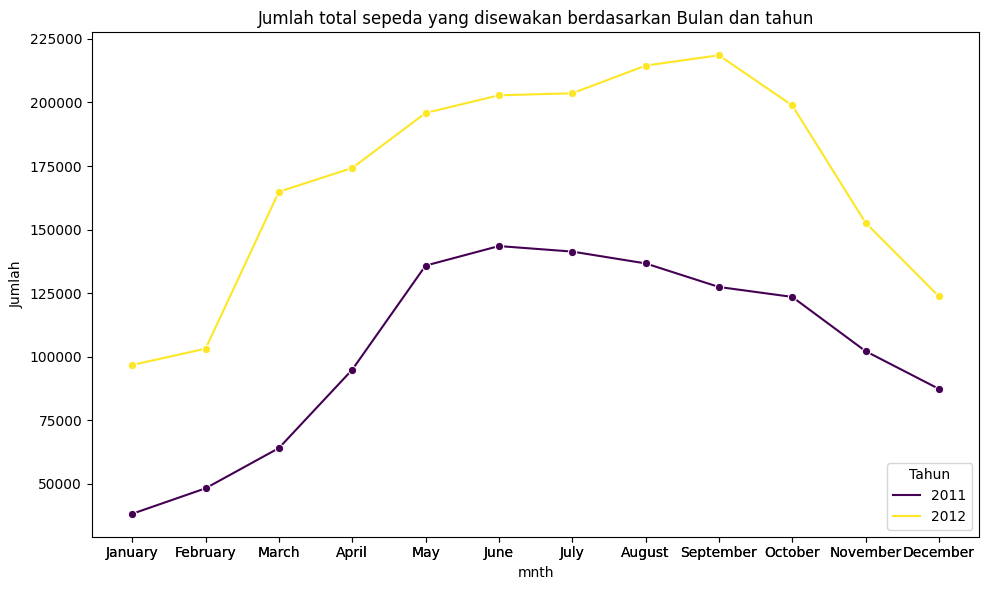

In [130]:
monthly_counts = day_df.groupby(by=["mnth","yr"]).agg({
    "cnt": "sum"
}).reset_index()

bulan_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
monthly_counts["mnth"] = pd.Categorical(monthly_counts["mnth"], categories=bulan_order, ordered=True)

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_counts, x="mnth", y="cnt", hue="yr", palette="viridis", marker="o")

plt.ylabel("Jumlah")
plt.title("Jumlah total sepeda yang disewakan berdasarkan Bulan dan tahun")
plt.legend(title="Tahun", loc="lower right")
plt.xticks(ticks=monthly_counts["mnth"], labels=monthly_counts["mnth"])
plt.tight_layout()
plt.show()

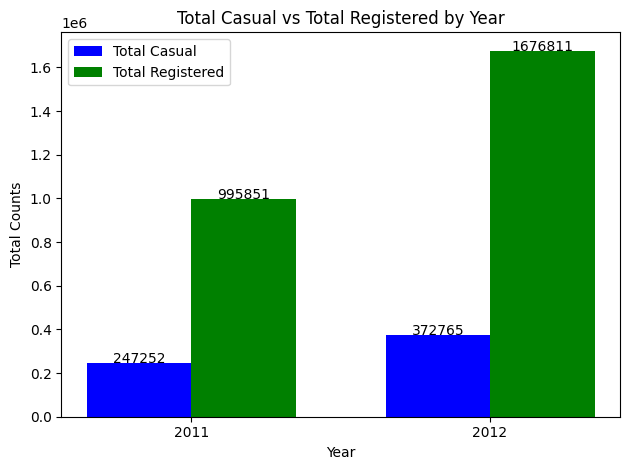

In [132]:
casual_year_counts = day_df.groupby("yr")["casual"].sum()
casual_year_counts = casual_year_counts.reset_index()
casual_year_counts.columns = ["yr", "total_casual"]


reg_year_counts = day_df.groupby("yr")["registered"].sum()
reg_year_counts = reg_year_counts.reset_index()
reg_year_counts.columns = ["yr", "total_registered"]

index = casual_year_counts["yr"]
bar_width = 0.35

p1 = plt.bar(index, casual_year_counts["total_casual"], bar_width, label="Total Casual", color="b")
p2 = plt.bar(index + bar_width, reg_year_counts["total_registered"], bar_width, label="Total Registered", color="g")

plt.xlabel("Year")
plt.ylabel("Total Counts")
plt.title("Total Casual vs Total Registered by Year")
plt.xticks(index + bar_width / 2, casual_year_counts["yr"])
plt.legend()
for p in p1 + p2:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 1, str(int(height)), ha="center")
plt.tight_layout()
plt.show()

### Pertanyaan 2: Bagaimana faktor musim memengaruhi permintaan sepeda untuk penggunaan harian?

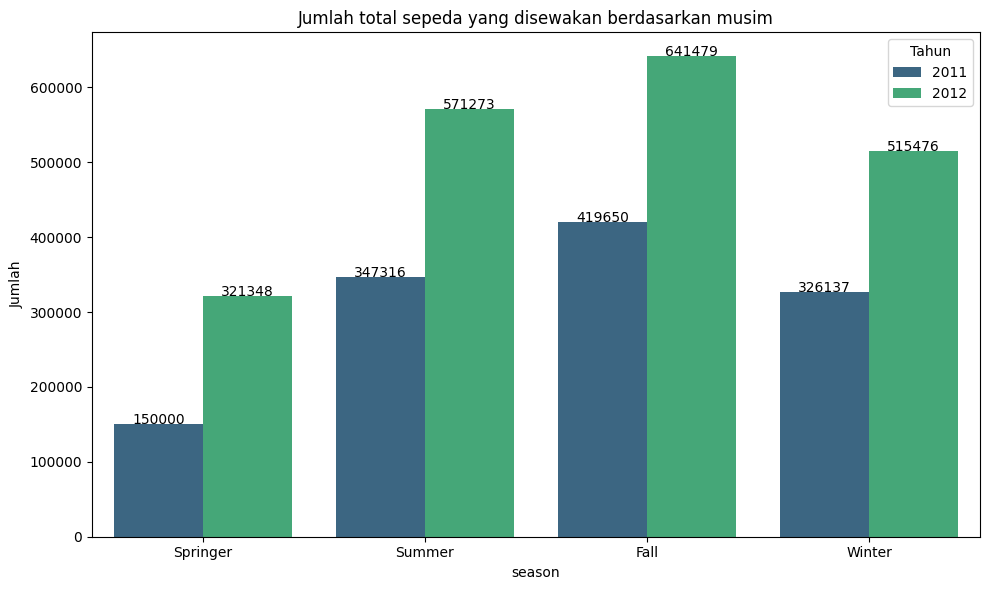

In [145]:
season_counts = day_df.groupby(by=["season", "yr"]).agg({
    "cnt": "sum"
}).reset_index()

# Urutkan DataFrame berdasarkan musim
season_order = ["Springer", "Summer", "Fall", "Winter"]
season_counts['season'] = pd.Categorical(season_counts['season'], categories=season_order, ordered=True)
season_counts = season_counts.sort_values(by="season")

# Membuat plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=season_counts, x="season", y="cnt", hue="yr", palette="viridis")

# Menampilkan jumlah di atas bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.ylabel("Jumlah")
plt.title("Jumlah total sepeda yang disewakan berdasarkan musim")
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()
plt.show()

###Pertanyaan 3: Bagaimana faktor cuaca (misalnya, suhu, kelembapan, kondisi cuaca) memengaruhi permintaan sepeda untuk penggunaan harian?

Berdasarkan cuaca

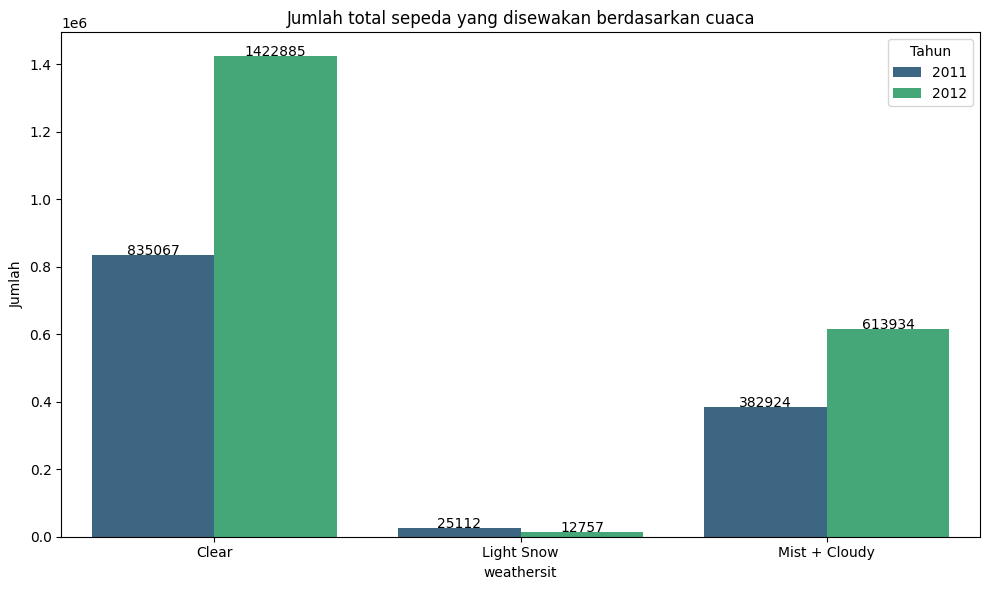

In [138]:
weather_counts = day_df.groupby(by=["weathersit", "yr"]).agg({
    "cnt": "sum"
}).reset_index()

# Membuat plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=weather_counts, x="weathersit", y="cnt", hue="yr", palette="viridis")

# Menampilkan jumlah di atas bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.ylabel("Jumlah")
plt.title("Jumlah total sepeda yang disewakan berdasarkan cuaca")
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()
plt.show()


Berdasarkan suhu

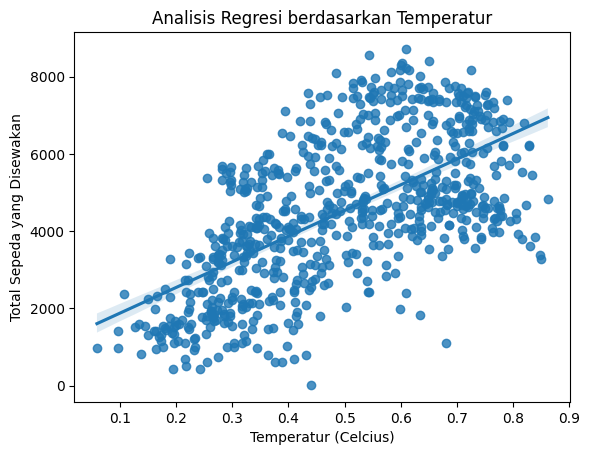

In [141]:
sns.regplot(x=day_df["temp"], y=day_df["cnt"])
plt.title("Analisis Regresi berdasarkan Temperatur")
plt.xlabel("Temperatur (Celcius)")
plt.ylabel("Total Sepeda yang Disewakan")
plt.show()

Berdasarkan kelembapan

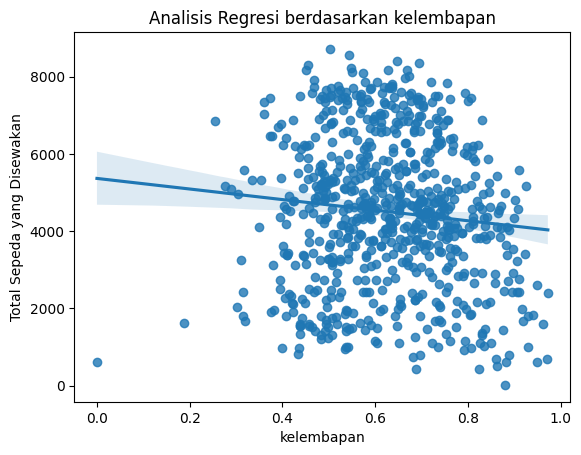

In [142]:
sns.regplot(x=day_df["hum"], y=day_df["cnt"])
plt.title("Analisis Regresi berdasarkan kelembapan")
plt.xlabel("kelembapan")
plt.ylabel("Total Sepeda yang Disewakan")
plt.show()

## Conclusion

- Pertanyaan 1: Berdasarkan grafik yang ditampilkan dari analisis dataframe day_df pada kolom mnth dapat disimpulkan bulan yang memiliki jumlah penyewaan sepeda terbanyak yaitu pada bulan September tahun 2012 dan bulan Juni tahun 2011. Lalu, jumlah pengguna baru lebih banyak daripada pengguna casual yang sering menyewa sepeda baik ditahun 2011 dan 2012. Perbedaan pada tahun 2012 sangat signifikan dengan perbedaan sebanyak 1.304.046 antara pengguna baru dengan pengguna casual. Tren paling tinggi untuk penyewaan sepeda dimiliki oleh pengguna baru pada tahun 2012. Hal ini berdasarkan analisis pada dataframe day_df.

- Pertanyaan 2: Grafik batang diatas menunjukkan bahwa penggunaan bike sharing memiliki variasi yang signifikan terhadap musim yang berbeda. Dengan kata lain, penggunaan bike sharing cenderung lebih tinggi saat musim-musim yang lebih hangat seperti musim gugur dan musim panas, dan cenderung menurun selama musim-musim yang lebih dingin seperti musim semi dan musim dingin. Peningkatan penggunaan selama musim hangat seperti musim panas dan musim gugur dapat dipahami sebagai respons alami terhadap cuaca yang lebih menyenangkan dan kondisi jalan yang lebih baik. Sebaliknya, penurunan penggunaan selama musim dingin dan musim semi mungkin disebabkan oleh cuaca yang tidak sebaik saat musim hangat.

- Pertanyaan 3: Berdasarkan visualisasi data yang ditampilkan dari analisis dataframe day_df berdasarkan kolom weathersit dan yr didapatkan kesimpulan baik pada tahun 2011 dan 2012 bahwa jumlah penyewaan sepeda paling banyak terjadi pada cuaca yang Clear, sedangkan jumlah penyewaan sepeda paling sedikit terjadi pada cuaca yang nomor Light Snow.
Suhu temperature dan total penyewaan sepeda yang digunakan memiliki hubungan yang positif. Semakin tinggi suhu udara, semakin tinggi jumlah penyewaan sepeda. Faktor kelembapan (hum) mempengaruhi tingkat penyewaan sepeda dalam rentang 40-85%. Mungkin ada preferensi pengguna terkait dengan tingkat kelembapan tertentu. Kecepatan angin (windspeed) memiliki pengaruh pada kecepatan rentang 3-20 km/jam terhadap jumlah penyewaan sepeda. Ini dapat dijelaskan oleh kenyamanan bersepeda dalam kondisi angin yang lebih tenang.

In [146]:
main_df.to_csv('/content/main_data.csv', index=False)